# Extract the MS2 scan and do signature neutral loss search
- identify precursor and 

In [1]:
# !pip install pymzml
%matplotlib inline

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pymzml
import os
import pandas as pd
import sys

In [3]:
sys.path.append('../pyutils/')  # add the second parent directory
from searchMS2 import *

In [4]:
# spectrum.selected_precursors
# [{'mz': 417.320373535156, 'charge': 1, 'precursor id': '2'}]

In [5]:
infile = "../../../../MS_MS_raw_mzML/AX_RPneg_TDcells/mzML/ID_02.mzML"

In [6]:
exp = pymzml.run.Reader(infile)

[Warning] Not index found and build_index_from_scratch is False


# Basic information

In [7]:
# How many spectra
exp.get_spectrum_count()

4009

In [8]:
exp.ms_precisions # ms-level 1: ppm 5; ms-level 2: ppm 20?

{None: 0.0001, 0: 0.0001, 1: 5e-06, 2: 2e-05}

In [9]:
ii = 0
for spec in exp:
    if spec.ms_level == 2: # select ms2 level
        precursor_dict = spec.selected_precursors[0]
        if 'charge' not in precursor_dict:
            print(precursor_dict)
            ii+=1
    if ii > 5:
        break

{'mz': 416.020263671875, 'precursor id': '2'}
{'mz': 416.020263671875, 'precursor id': '2'}
{'mz': 700.323181152344, 'precursor id': '12'}
{'mz': 700.323181152344, 'precursor id': '12'}
{'mz': 491.013397216797, 'precursor id': '17'}
{'mz': 491.013397216797, 'precursor id': '17'}


##### there is a possible situation where charge can be absent in the dictionary

##### summary
- a probably 12 min run (720 secs) for 4008 scans

In [10]:
spectra = get_potental_precursor_from_file(infile, 
                          min_scan_number = 1600, 
                          max_scan_number = 1800, 
                          min_mz = 834.5200, 
                          max_mz = 834.5300, 
                          ms_level=2)

[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False


In [11]:
# this function only works for situation where you look at charge state = 1
res_data = []
NL_mz = 87.03124 # 87.03124
for spec in spectra:
    selected_precursor_mz = spec.selected_precursors[0]['mz'] # this m/z will not be exactly the precursor m/z
    sel_mz = [mz for mz in spec.mz if abs(mz - selected_precursor_mz) < np.ceil(NL_mz)]
    
    for mz in sel_mz:
        calc_ppm = abs(((selected_precursor_mz - mz) - NL_mz)*1000000/NL_mz)
        if calc_ppm < 30:
            print(calc_ppm)
            res_data.append(spec)
            break

16.946141985688676
17.647443682068047
23.257857250490446
25.361762339628555


In [12]:
res_data

[<__main__.Spectrum object with native ID 1685 at 0x7f8cadc17550>,
 <__main__.Spectrum object with native ID 1687 at 0x7f8cadc177f0>,
 <__main__.Spectrum object with native ID 1705 at 0x7f8cadc17a30>,
 <__main__.Spectrum object with native ID 1707 at 0x7f8cadc17310>]

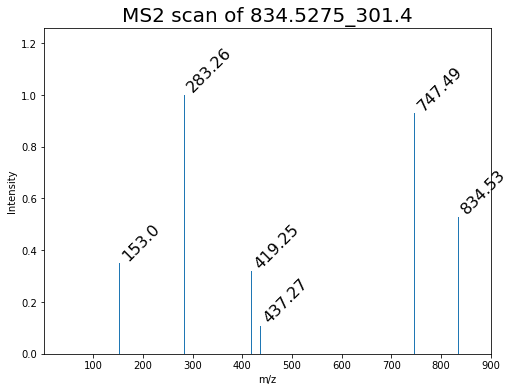

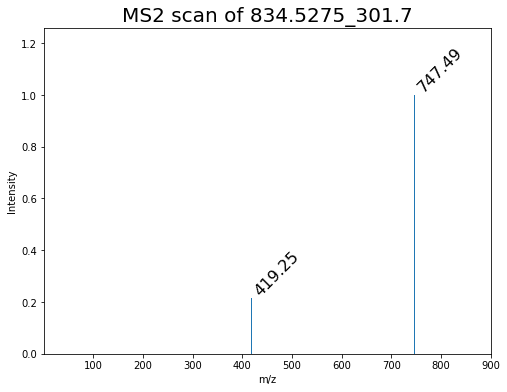

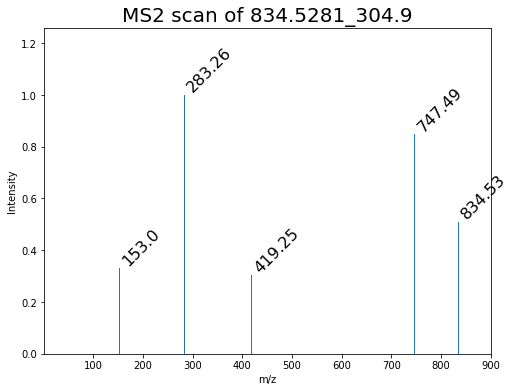

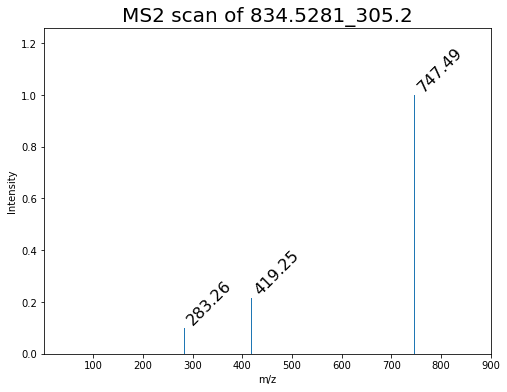

In [13]:
plot_spectra(spectra = res_data)